# <center> ADAPTIVE COMPUTATION AND MACHINE LEARNING (COMS4030A)

## <center> Project: Customer Segmentation 
<center> Joshua Wacks  <center> Alex Vogt <center> Sonia Bullah

Add decription of project!

# Import and Preview Data

Add description about dataset

The following imported libraries will be used in the code:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import missingno
pd.options.mode.chained_assignment = None  # default='warn'
import datetime

It is necessary to import as well as preview the data provided by the dataset. This can be done as follows:

In [2]:
# First, we have to read in the dataset:
df = pd.read_csv("online_retail_II.csv")
df = df.rename(columns={"Customer ID":"CustomerID"})

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])#convert to datetime

# Show the first 5 entries of the dataset:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
# Show the last 5 entries of the dataset:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [4]:
# Obtain information on each attribute of the dataset:
df.info()

#TODO show the range of different fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   CustomerID   417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
# Get the descriptive statistics of the dataset:
df.describe()

,Quantity,Price,CustomerID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


## Data Cleaning



<AxesSubplot:>

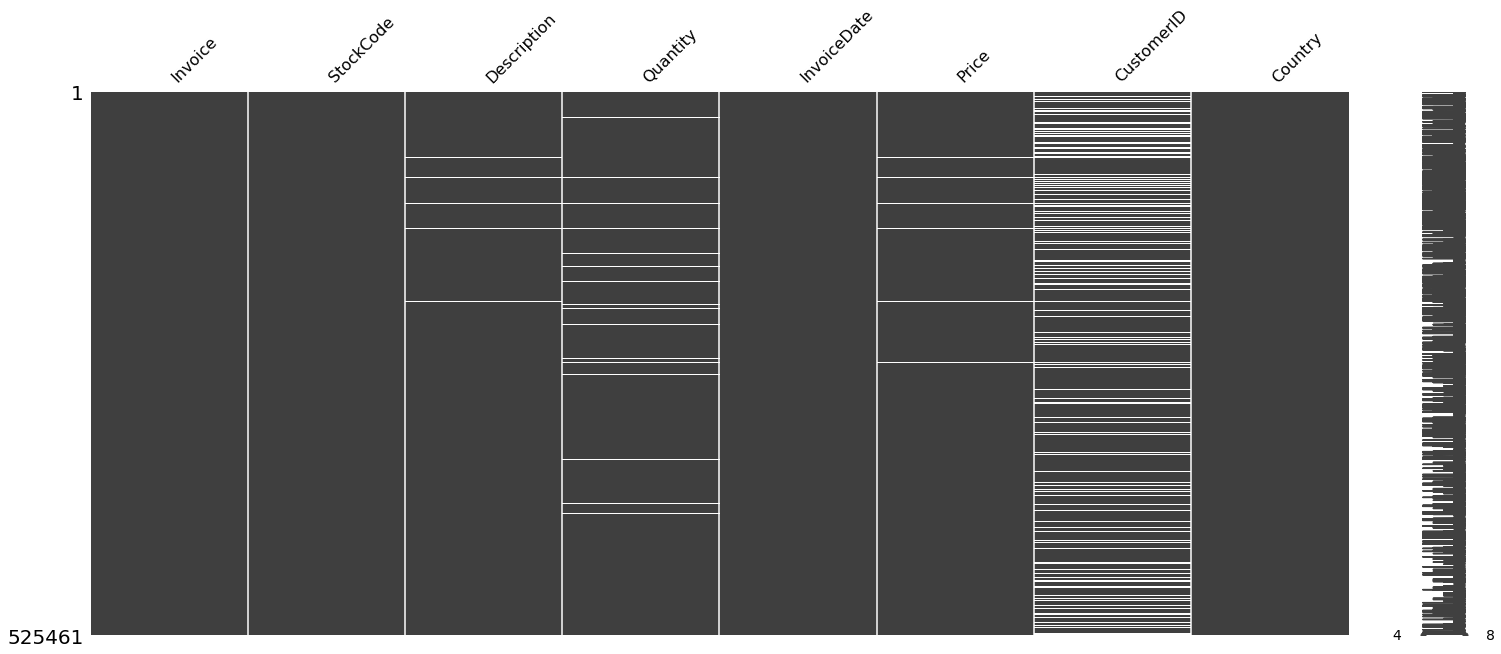

In [6]:
#Replace all the 0 and negative values with nan for two reasons
#1) To visualise the 'irrelevant' entries
#2) To treat all these nan values uniformly and drop them
df = df.replace(0,np.nan)

# Negative quantities refer to returns and that is beyond the scope of this customer segmentation
df['Price'][df['Price'] <0] = np.nan  
df['Quantity'][df['Quantity'] <0] = np.nan


missingno.matrix(df)

Therefore, there are some missing values in the dataset. Let's find out which columns contain these null values.

Quantity Column

In [7]:
# Check to see if there are any missing or 0 values in the dataset:
numNans = df['Quantity'].isna().sum()/len(df) *100
print(F"Number of nan values in the Quantity column {numNans}%. Thus we can drop these rows")
df = df[df['Quantity'].notna()]  # We only take the Quantity values that are not nan
#TODO put in report

Number of nan values in the Quantity column 2.3457497321399687%. Thus we can drop these rows


Price Column

In [8]:
# Check to see if there are any missing or 0 values in the dataset:
numNans = df['Price'].isna().sum()/len(df) *100
print(F"Number of nan values in the Price column {numNans}%. Thus we can drop these rows")
df = df[df['Price'].notna()]  # We only take the Price values that are not nan
#TODO put in report

Number of nan values in the Price column 0.3057674880879301%. Thus we can drop these rows


Customer ID Column

In [9]:
numNans = df['CustomerID'].isna().sum()/len(df) *100
print(F"The number of missing Customer IDs is only {numNans}%. Thus we can drop these rows")
df = df[df['CustomerID'].notna()]  # We only take the Customer ID values that are not nan

#TODO discuss why we can do this

The number of missing Customer IDs is only 20.31057576148532%. Thus we can drop these rows


<AxesSubplot:>

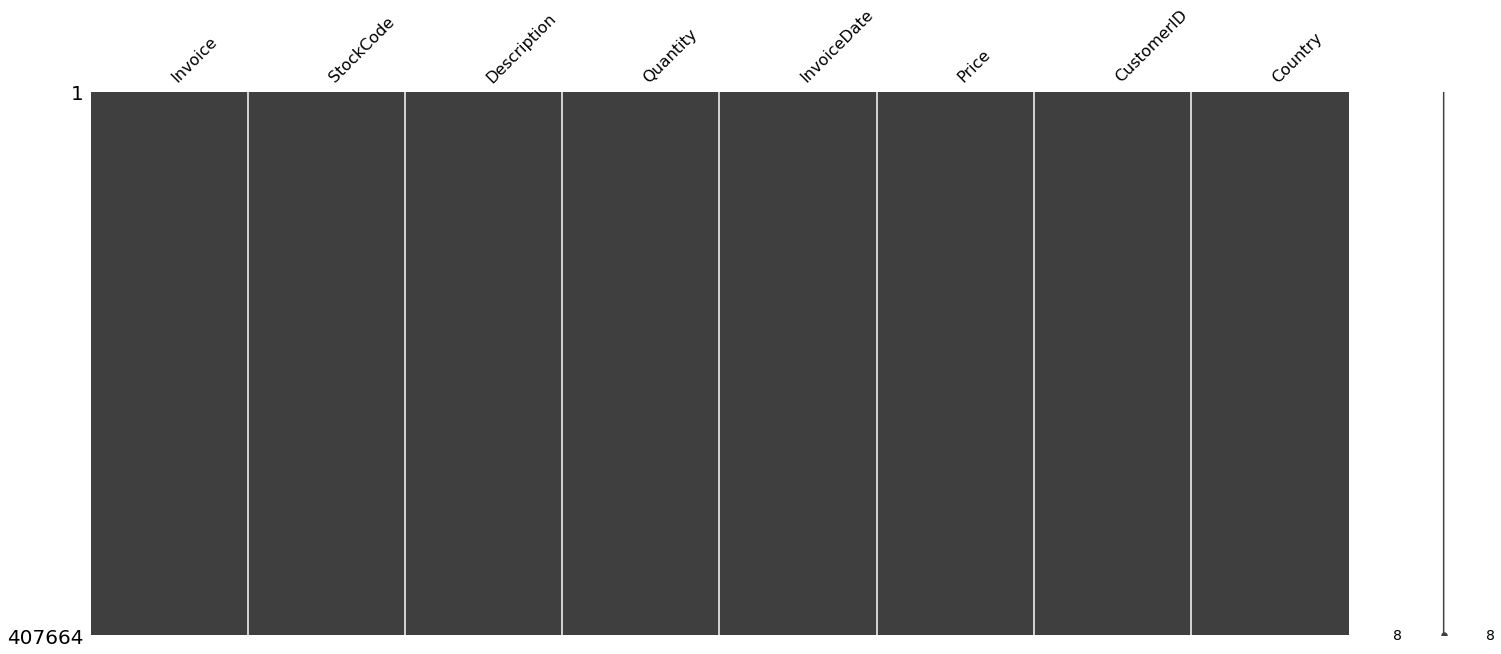

In [10]:
missingno.matrix(df)

In [11]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64

All the missing and irrelevant data has been removed

Converting the descriptive data to numerical values, by means of label encoding.

In [12]:
#label encoding for non numeric features
df['Country'].value_counts()
df['Country'] = df['Country'].astype('category').cat.codes
df['Invoice'] = df['Invoice'].astype('category').cat.codes
df['StockCode'] = df['StockCode'].astype('category').cat.codes
df['Description'] = df['Description'].astype('category').cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407664 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407664 non-null  int16         
 1   StockCode    407664 non-null  int16         
 2   Description  407664 non-null  int16         
 3   Quantity     407664 non-null  float64       
 4   InvoiceDate  407664 non-null  datetime64[ns]
 5   Price        407664 non-null  float64       
 6   CustomerID   407664 non-null  float64       
 7   Country      407664 non-null  int8          
dtypes: datetime64[ns](1), float64(3), int16(3), int8(1)
memory usage: 18.3 MB


Z-Score to remove Outliers

In [13]:
# def zScore():
# 	df_copy = df.copy()
# 	df_copy['z_score'] = stats.zscore(df_copy['Quantity'])
# 	outlier_index = df_copy.index[df_copy['z_score'] > 3]
# 	df.drop(outlier_index, inplace=True)
# 	# outlier_index.sort_values(by = 'Quantity',inplace = True)
# 	# print(outlier_index)
 
# # zScore()
# # outlier_subplots()

## Feature Selection and Engineering

We will be using the following features\
1)Invoice\
2)StockCode\
3)Quantity\
4)Price\
5)InvoiceDate\
6)CustomerID

In [14]:
df = df[['Invoice','StockCode','Quantity','Price','InvoiceDate','CustomerID','Country']]
df.head()

,Invoice,StockCode,Quantity,Price,InvoiceDate,CustomerID,Country
0,0,3410,12.0,6.95,2009-12-01 07:45:00,13085.0,34
1,0,2729,12.0,6.75,2009-12-01 07:45:00,13085.0,34
2,0,2731,12.0,6.75,2009-12-01 07:45:00,13085.0,34
3,0,1250,48.0,2.10,2009-12-01 07:45:00,13085.0,34
4,0,615,24.0,1.25,2009-12-01 07:45:00,13085.0,34


Create an aggregated variable named Amount, by multiplying Quantity with Price, which gives the total amount of money spent per product / item in each transaction.

In [15]:
df['Amount'] = df['Quantity'] * df['Price']

df.head()

,Invoice,StockCode,Quantity,Price,InvoiceDate,CustomerID,Country,Amount
0,0,3410,12.0,6.95,2009-12-01 07:45:00,13085.0,34,83.4
1,0,2729,12.0,6.75,2009-12-01 07:45:00,13085.0,34,81.0
2,0,2731,12.0,6.75,2009-12-01 07:45:00,13085.0,34,81.0
3,0,1250,48.0,2.10,2009-12-01 07:45:00,13085.0,34,100.8
4,0,615,24.0,1.25,2009-12-01 07:45:00,13085.0,34,30.0


Separate the variable InvoiceDate into two variables Date and Time. This allows different transactions created by the same consumer on the same day but at different times to be treated separately.

In [16]:
df['Date'] = df['InvoiceDate'].dt.date
df['Time'] = df['InvoiceDate'].dt.time
df.sort_values('CustomerID',inplace=True)
df.head(33)

,Invoice,StockCode,Quantity,Price,InvoiceDate,CustomerID,Country,Amount,Date,Time
253032,9187,2507,1.0,7.49,2010-06-28 13:53:00,12346.0,34,7.49,2010-06-28,13:53:00
253038,9187,1859,1.0,7.49,2010-06-28 13:53:00,12346.0,34,7.49,2010-06-28,13:53:00
253037,9187,2505,1.0,7.49,2010-06-28 13:53:00,12346.0,34,7.49,2010-06-28,13:53:00
253036,9187,857,1.0,7.49,2010-06-28 13:53:00,12346.0,34,7.49,2010-06-28,13:53:00
253035,9187,1860,1.0,7.49,2010-06-28 13:53:00,12346.0,34,7.49,2010-06-28,13:53:00
253034,9187,2502,1.0,7.49,2010-06-28 13:53:00,12346.0,34,7.49,2010-06-28,13:53:00
45230,1513,4015,5.0,4.50,2010-01-04 09:53:00,12346.0,34,22.50,2010-01-04,09:53:00
107804,3705,24,1.0,5.95,2010-03-02 13:08:00,12346.0,34,5.95,2010-03-02,13:08:00
107803,3705,22,1.0,5.95,2010-03-02 13:08:00,12346.0,34,5.95,2010-03-02,13:08:00
253039,9187,1557,1.0,7.49,2010-06-28 13:53:00,12346.0,34,7.49,2010-06-28,13:53:00


Filter out any of the none UK transactions

In [17]:
df = df.loc[df['Country'] == 34]

df.drop(columns=['Invoice','StockCode','Quantity','Price','InvoiceDate'])

,CustomerID,Country,Amount,Date,Time
253032,12346.0,34,7.49,2010-06-28,13:53:00
253038,12346.0,34,7.49,2010-06-28,13:53:00
253037,12346.0,34,7.49,2010-06-28,13:53:00
253036,12346.0,34,7.49,2010-06-28,13:53:00
253035,12346.0,34,7.49,2010-06-28,13:53:00
...,...,...,...,...,...
199806,18287.0,34,12.75,2010-05-17,11:55:00
199805,18287.0,34,15.00,2010-05-17,11:55:00
199804,18287.0,34,15.00,2010-05-17,11:55:00
199813,18287.0,34,15.30,2010-05-17,11:55:00


Sort out the dataset by Postcode and create three essential aggregated variables Recency, Frequency and Monetary. Calculate the values of these variables per postcode.

Monetary Column

In [18]:
df['Monetary'] = df.groupby('CustomerID')['Amount'].transform('sum')
df['Min'] = df.groupby('CustomerID')['Amount'].transform('min')
df['Max'] = df.groupby('CustomerID')['Amount'].transform('max')
df['Avg'] = df.groupby('CustomerID')['Amount'].transform('mean')

df.tail(50)


# df.head()

,Invoice,StockCode,Quantity,Price,InvoiceDate,CustomerID,Country,Amount,Date,Time,Monetary,Min,Max,Avg
348035,12997,1347,6.0,4.95,2010-09-21 12:17:00,18287.0,34,29.70,2010-09-21,12:17:00,2345.71,5.04,122.4,27.596588
348036,12997,1320,6.0,4.95,2010-09-21 12:17:00,18287.0,34,29.70,2010-09-21,12:17:00,2345.71,5.04,122.4,27.596588
348037,12997,2851,30.0,0.21,2010-09-21 12:17:00,18287.0,34,6.30,2010-09-21,12:17:00,2345.71,5.04,122.4,27.596588
348038,12997,615,12.0,1.25,2010-09-21 12:17:00,18287.0,34,15.00,2010-09-21,12:17:00,2345.71,5.04,122.4,27.596588
348040,12997,1273,12.0,1.65,2010-09-21 12:17:00,18287.0,34,19.80,2010-09-21,12:17:00,2345.71,5.04,122.4,27.596588
348047,12997,2161,4.0,8.95,2010-09-21 12:17:00,18287.0,34,35.80,2010-09-21,12:17:00,2345.71,5.04,122.4,27.596588
199846,7190,1432,8.0,1.65,2010-05-17 11:55:00,18287.0,34,13.20,2010-05-17,11:55:00,2345.71,5.04,122.4,27.596588
348049,12997,1973,48.0,2.55,2010-09-21 12:17:00,18287.0,34,122.40,2010-09-21,12:17:00,2345.71,5.04,122.4,27.596588
199799,7190,1030,12.0,1.65,2010-05-17 11:55:00,18287.0,34,19.80,2010-05-17,11:55:00,2345.71,5.04,122.4,27.596588
199798,7190,791,12.0,1.25,2010-05-17 11:55:00,18287.0,34,15.00,2010-05-17,11:55:00,2345.71,5.04,122.4,27.596588


Recency Column

In [19]:
simulated_date = datetime.date(2011,1,1)
print(simulated_date.month)
print(df['Date'][0].month)
df.sort_values(by='InvoiceDate',ascending=False).groupby('CustomerID')
df['Recency'] = (simulated_date.year - pd.DatetimeIndex(df['Date']).year) * 12  + (simulated_date.month - pd.DatetimeIndex(df['Date']).month)
df['Recency'] = df['Recency'] 

# df.head(33)

res = df.groupby(['CustomerID']).apply(lambda x:x['Recency'].min())
print(res)


1
12
CustomerID
12346.0     7
12608.0     3
12745.0     5
12746.0     7
12747.0     1
           ..
18283.0     2
18284.0     3
18285.0    11
18286.0     5
18287.0     2
Length: 3969, dtype: int64


Frequency Column

In [20]:
# df['Frequency']=df.groupby(by=['CustomerID','Invoice'])['CustomerID'].transform('count')
# df.head()
freq = df.groupby(['CustomerID','Invoice']).size().reset_index(drop=False).groupby('CustomerID')[[0]].count()
print(freq)
print(freq[0])
# df['Frequency'] = df.groupby(['CustomerID','Invoice']).size().reset_index(drop=False).groupby('CustomerID')[[0]].count()
# df.head()



             0
CustomerID    
12346.0     11
12608.0      1
12745.0      2
12746.0      1
12747.0     16
...         ..
18283.0      6
18284.0      1
18285.0      1
18286.0      2
18287.0      4

[3969 rows x 1 columns]
CustomerID
12346.0    11
12608.0     1
12745.0     2
12746.0     1
12747.0    16
           ..
18283.0     6
18284.0     1
18285.0     1
18286.0     2
18287.0     4
Name: 0, Length: 3969, dtype: int64


In [21]:
mon =  df.groupby(['CustomerID'])['Monetary'].unique().astype(float)
min =  df.groupby(['CustomerID'])['Min'].unique().astype(float)
max =  df.groupby(['CustomerID'])['Max'].unique().astype(float)
mean =  df.groupby(['CustomerID'])['Avg'].unique().astype(float)

df_new = pd.DataFrame({'Recency':res,'Frequency':freq[0],'Monetary':mon,'Min':min,'Max':max,'Mean':mean})
df_new.head()
# print(df_new.info())


,Recency,Frequency,Monetary,Min,Max,Mean
CustomerID,,,,,,
12346.0,7,11,372.86,1.00,45.00,11.298788
12608.0,3,1,415.79,0.95,162.24,25.986875
12745.0,5,2,723.85,10.08,102.00,32.902273
12746.0,7,1,254.55,12.60,17.70,14.973529
12747.0,1,16,5080.53,2.25,381.60,32.990455


### Outlier Detection

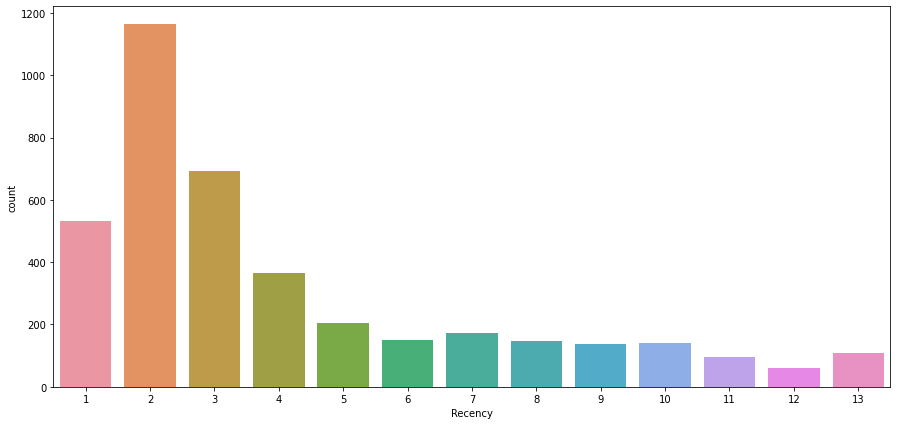

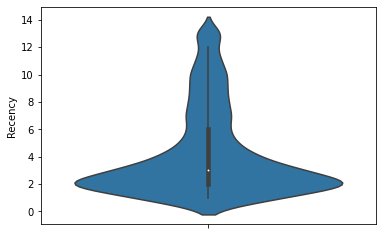

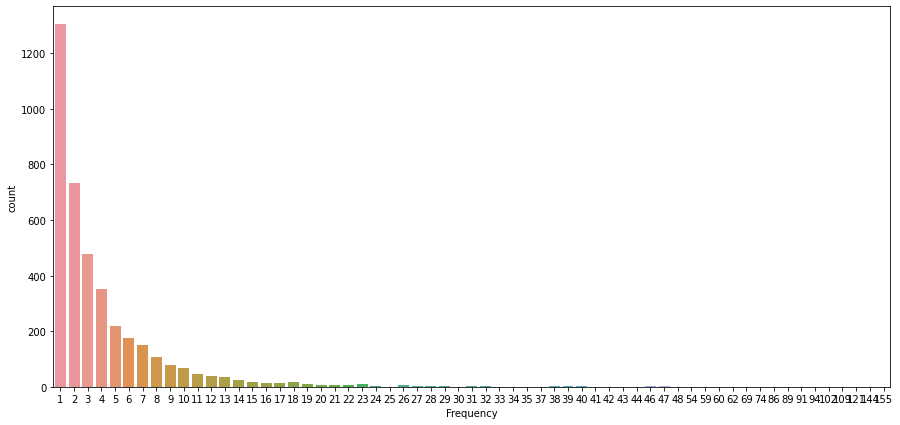

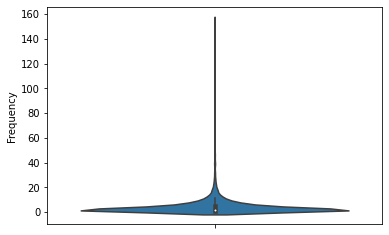

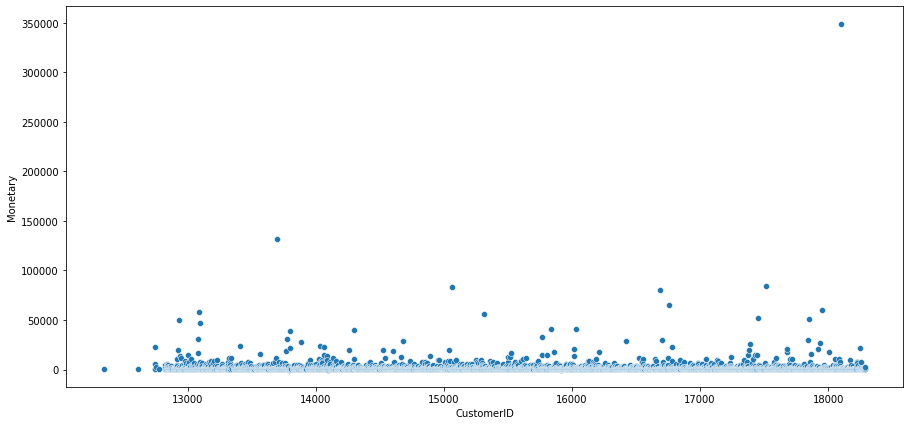

In [22]:
def outlier_subplots():
	for clm in ['Recency','Frequency']:
		plt.figure(figsize=(15,7))
		sns.countplot(data = df_new, x = clm)
		plt.show()
	
		sns.violinplot(data = df_new, y = clm)
		plt.show()
	
	plt.figure(figsize=(15,7))	
 
	sns.scatterplot(data = df_new.Monetary)
	plt.show()
outlier_subplots()


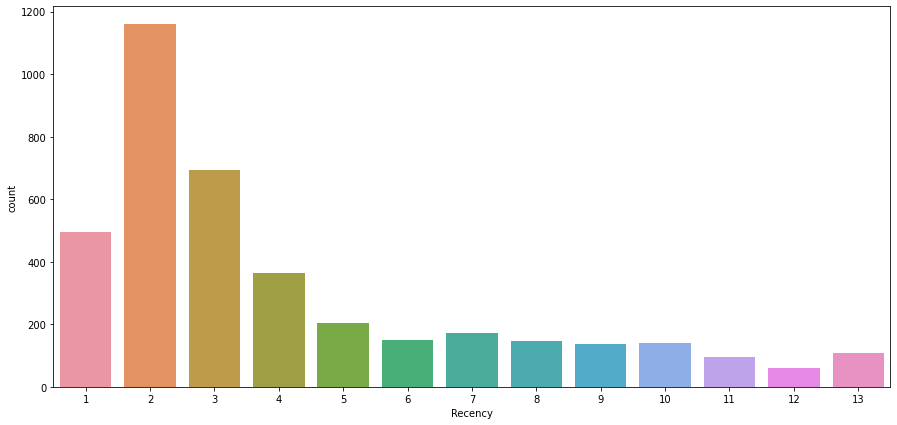

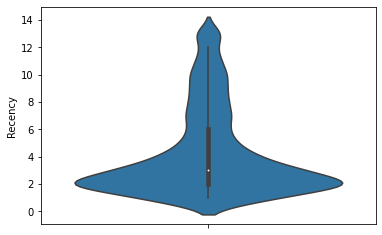

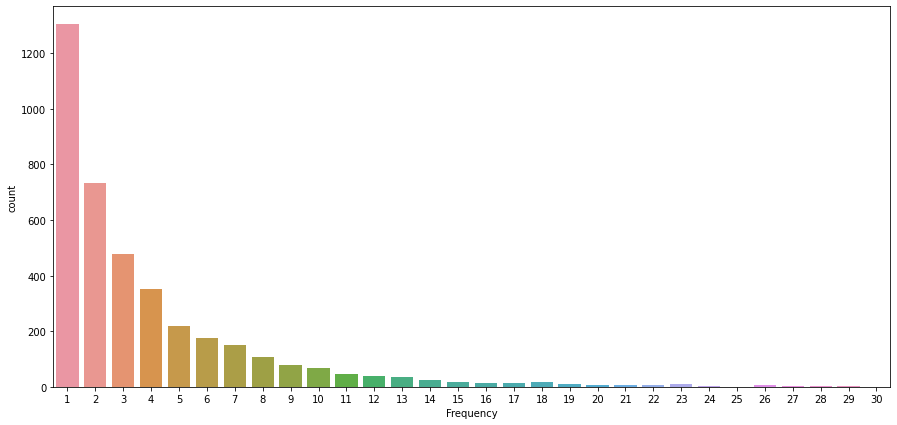

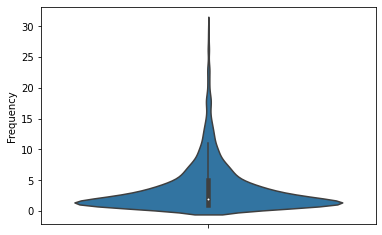

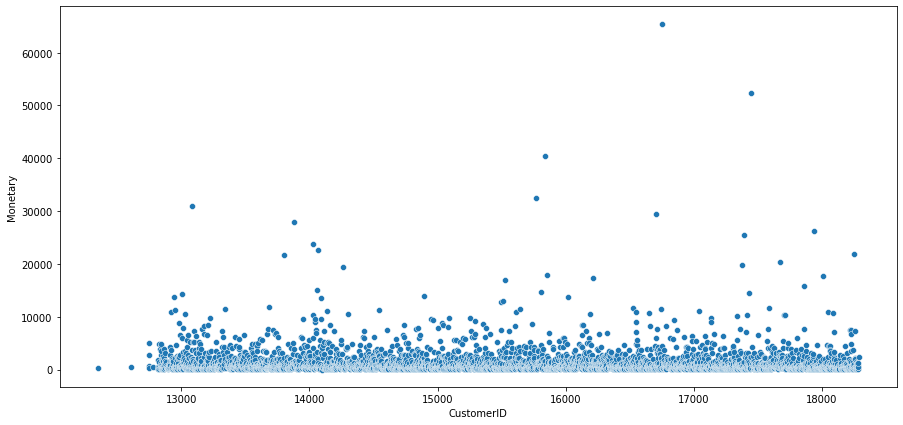

<AxesSubplot:xlabel='Monetary', ylabel='Count'>

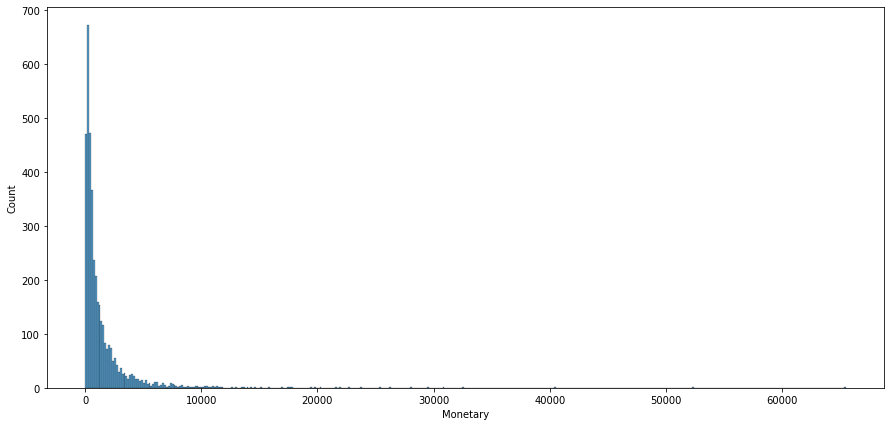

In [23]:
def remove_outliers():
	condition = df_new.index[df_new['Frequency'] > 30]
	df_new.drop(condition, inplace=True)
 
	condition = df_new.index[df_new['Monetary'] > 75000]
	df_new.drop(condition, inplace=True)

 
remove_outliers()
outlier_subplots()
plt.figure(figsize=(15,7))
sns.histplot(data = df_new['Monetary'])